In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error as mse

In [6]:
import seaborn as sns


In [7]:
for dirname, _, filenames in os.walk('MagicBricks.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
nRowsRead = 1259 # specify 'None' if want to read whole file
# MagicBricks.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('MagicBricks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MagicBricks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns


In [10]:
df1.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [11]:
df1.describe()


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [13]:
df1['BHK'].value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64

In [14]:
df1[df1['BHK']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
163,4050.0,6,3.0,Furnished,Budh Vihar Phase 1,1.0,5100000,Ready_to_move,Resale,Builder_Floor,1259.0
164,2400.0,6,4.0,Furnished,Budh Vihar Phase 2,1.0,6000000,Ready_to_move,Resale,Builder_Floor,2500.0
261,2800.0,6,4.0,Semi-Furnished,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,Ready_to_move,Resale,Apartment,15459.0
352,324.0,6,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,8700000,Ready_to_move,Resale,Builder_Floor,35714.0
353,720.0,6,5.0,Furnished,"Yamuna Vihar, Shahdara",1.0,22000000,Ready_to_move,Resale,Builder_Floor,35714.0
585,5500.0,6,7.0,Furnished,Safdarjung Enclave,1.0,160000000,Ready_to_move,Resale,Apartment,14818.0


In [15]:
df1.drop([721,345,163,164,261,352,353,585],inplace=True)  ##### these are indexes of rows, being removed from dataset


In [17]:
df1[df1['Bathroom']==6]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
225,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
495,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
527,810.0,5,6.0,Furnished,Geeta Colony,1.0,28900000,Ready_to_move,Resale,Apartment,6667.0
659,3050.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,NaN,62500000,Ready_to_move,Resale,Apartment,20492.0
676,3112.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,3.0,60000000,Ready_to_move,Resale,Apartment,19280.0
681,2300.0,5,6.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,58000000,Ready_to_move,Resale,Apartment,21311.0
1211,4350.0,4,6.0,Semi-Furnished,"Orchid Metropolis, Hauz Khas",2.0,135000000,Ready_to_move,New_Property,Apartment,170000.0


In [18]:
df1[df1['Bathroom']==7]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
248,10350.0,4,7.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
1029,5236.0,5,7.0,Unfurnished,"The Amaryllis, Karol Bagh",3.0,73700000,Almost_ready,New_Property,Apartment,14092.0


In [19]:
df1.drop([225,495,527,659,676,681,1211,248,1029],inplace=True)


<AxesSubplot:xlabel='Furnishing', ylabel='Price'>

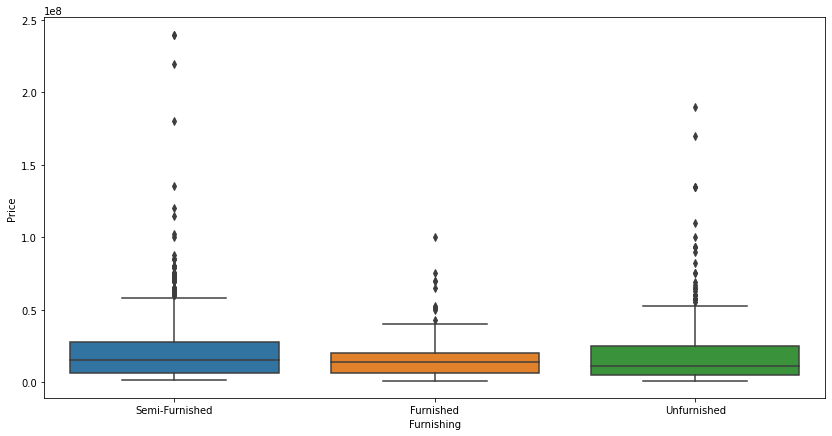

In [20]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df1.Furnishing,y=df1.Price)

In [21]:
df1.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         32
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       240
dtype: int64

In [22]:
df1.Parking.fillna(0,inplace=True)

In [23]:
df1[df1.Parking==39]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
875,365.0,1,1.0,Unfurnished,Narela,39.0,3500000,Ready_to_move,Resale,Apartment,7143.0
876,390.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,Resale,Apartment,5128.0
877,350.0,1,1.0,Unfurnished,"DDA Flats Pocket 3, Narela",39.0,3000000,Ready_to_move,Resale,Apartment,5128.0
878,210.0,1,1.0,Semi-Furnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,New_Property,Apartment,5128.0
879,50.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,3500000,Ready_to_move,New_Property,Apartment,5128.0
880,500.0,1,1.0,Unfurnished,"DDA Pocket H, Narela",39.0,1800000,Ready_to_move,Resale,Apartment,3600.0
881,350.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,1600000,Ready_to_move,Resale,Apartment,4571.0


In [24]:
df1['Parking'].replace([39,114],1,inplace=True)
df1['Parking'].replace([5,9,10],4,inplace=True)

<AxesSubplot:xlabel='Transaction', ylabel='Price'>

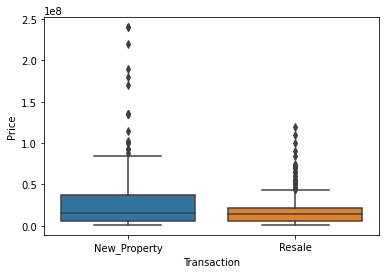

In [25]:
sns.boxplot(x=df1.Transaction,y=df1.Price)

<AxesSubplot:xlabel='Area', ylabel='Price'>

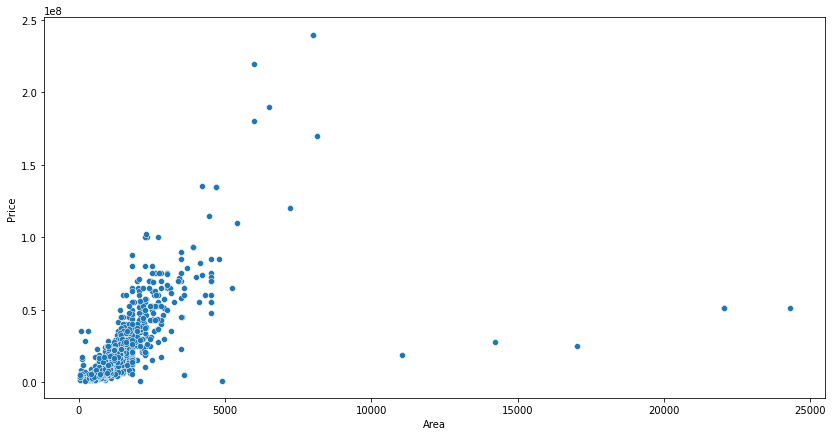

In [26]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1.Area,y=df1.Price)

In [27]:
df1.drop('Per_Sqft',axis=1,inplace=True)

In [28]:
df1.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
dtype: int64

In [29]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

In [30]:
df1 = pd.get_dummies(df1)

In [31]:
Y = df1.Price
X = df1.drop('Price',axis=1)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [33]:
x_train

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1","Locality_Aashirwaad Chowk, Dwarka","Locality_Abhimanyu Apartments, Vasundhara Enclave",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1088,600.0,3,2.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
96,1600.0,3,3.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1144,1250.0,3,3.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
896,50.0,1,1.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
180,350.0,1,1.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,1250.0,3,2.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1111,1800.0,4,4.0,2.0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1146,1400.0,3,2.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
875,365.0,1,1.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)   ########### traing model
pred = lr.predict(x_test) 

In [35]:
pred

array([ 1.44411134e+13,  4.22162270e+07,  3.57393370e+07,  1.54016250e+07,
        2.01554410e+07, -1.12751890e+07, -1.33822730e+07, -5.82579000e+05,
        9.31737100e+06,  1.33085830e+07,  6.85188230e+07,  1.40876530e+07,
        9.58502770e+07,  6.93279500e+06,  2.42830110e+07,  1.44411122e+13,
        1.41760850e+07,  4.50001300e+06,  5.92167900e+06,  9.09956100e+06,
        2.66915590e+07, -3.78403100e+06,  1.44411152e+13,  4.93718390e+07,
        3.24987700e+06,  1.01594350e+07,  3.60742750e+07,  3.64999930e+07,
        5.28617250e+07,  4.17384250e+07,  6.69621810e+07,  3.19056550e+07,
        9.76605500e+06, -4.56811000e+05,  5.65849700e+06,  4.72920990e+07,
        1.50750530e+07,  2.78588390e+07,  9.39706900e+06,  3.03008700e+06,
        2.06294770e+07,  6.70785950e+07,  2.04013310e+07,  3.45642390e+07,
        5.88999900e+06,  3.66620910e+07,  1.80842250e+07,  1.44411076e+13,
        6.31035690e+07,  2.86778990e+07,  2.80290790e+07,  1.57103970e+07,
        1.51843136e+13,  

In [36]:
from math import sqrt

In [37]:
print(sqrt(mse(y_test,pred)))

15790498547014.898


In [38]:
lr = DecisionTreeRegressor()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(sqrt(mse(y_test,pred)))

12765525.700410996


<AxesSubplot:xlabel='Area', ylabel='Price'>

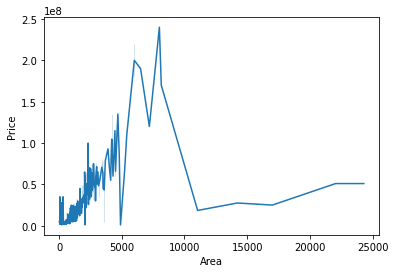

In [39]:
sns.lineplot(x=df1.Area,y=df1.Price)

In [40]:
p = np.array(df1[df1.Area>5000].index)
df1.drop(p,inplace=True)

<AxesSubplot:xlabel='Area', ylabel='Price'>

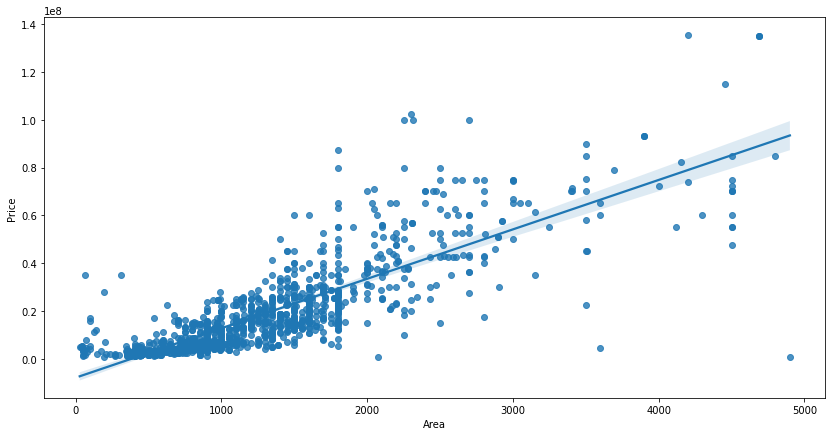

In [41]:
plt.figure(figsize=(14,7))
sns.regplot(x="Area", y="Price", data=df1)

In [42]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
lr = DecisionTreeRegressor()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(sqrt(mse(y_test,pred)))

10884406.853681045


In [43]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(sqrt(mse(y_test,pred)))

391412286343478.94
